В этом файле описаны примерные объяснения работы модели из файла tree_model.py
Для объяснения работы модели я буду использовать метод SHAP, так как он больше подходит для моей модели, нежели LIME, также я слегка преобразую данные в сэмпл из
200 элементов, так как с увеличением сэмпла графики не сильно изменяются, изменяется преимущественно кучность, но никак не общий результат.
Для определения признаков, на которые модель больше всего "смотрит" во время определния класса, я построю 3 графика: summary_plot, bar_plot, decision_plot 

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 200/200 [23:06<00:00,  6.93s/it]


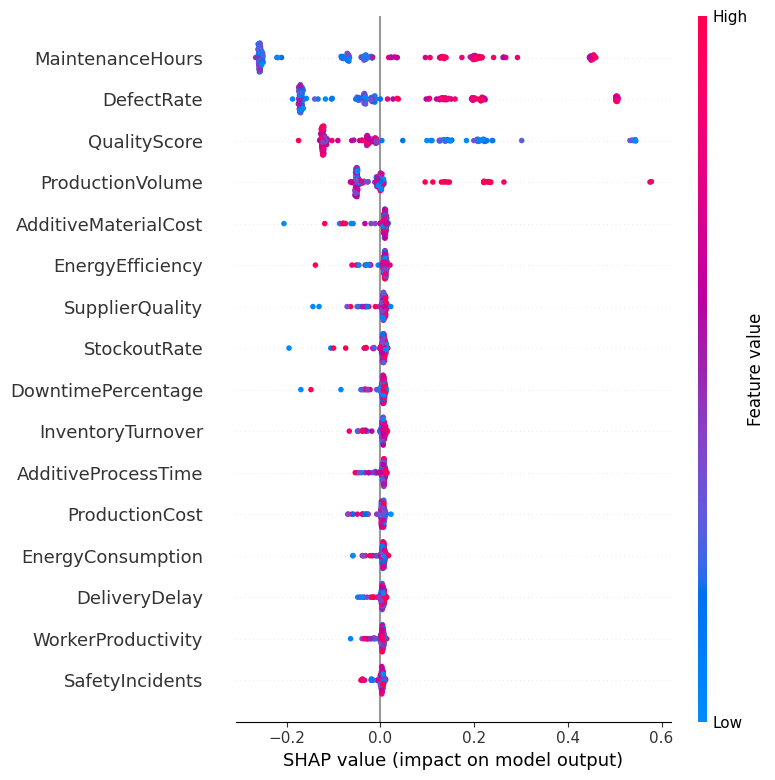

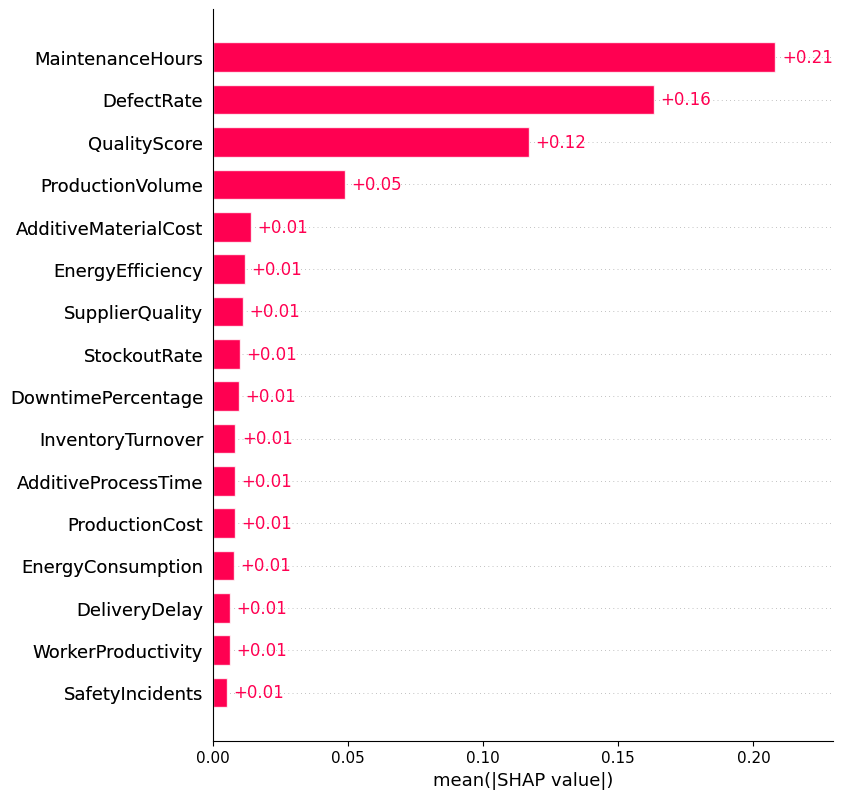

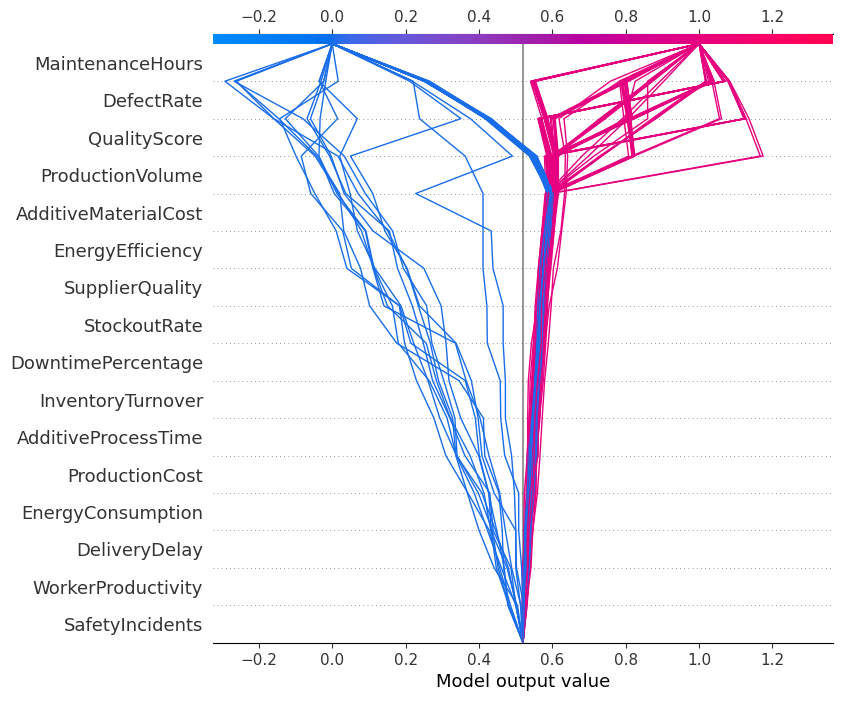

In [5]:
from scripts.tree_model import XAI, Voting, Model, df

"""TO SEE THE SOURCE CODE CHECK tree_model.py"""

XAI.BuildExplanationPlot(model=Voting.learn(df=df), X_train=Model.CreateTest(df=df)[0],
                            X_test=Model.CreateTest(df=df)[1], slice=200)


Исходя из графиков видно, что с большим отрывом по значимости для модели выбиваются вперед 4 признака: MaintenanceHours, DefectRate, QualityScore, 
ProductionVolume, далее еще 2 признака имеют немаленькую значимость для модели, но уже сильно меньшую, чем топ 4, а именно AdditiveMaterialCost и 
EnergyEfficiency, остальные признаки уже имеют весьма небольшое значение для модели, но тем не менее вносят свой вклад в итоговое решение модели.

Теперь посмотрим на то, как часто встречался каждый из признаков для отдельно каждой отдельно взятой строки в сэмпле, для этого я буду использовать
метод AnchorTabular и построю его график

Could not find an anchor satisfying the 0.95 precision constraint. Now returning the best non-eligible result. The desired precision threshold might not be achieved due to the quantile-based discretisation of the numerical features. The resolution of the bins may be too large to find an anchor of required precision. Consider increasing the number of bins in `disc_perc`, but note that for some numerical distribution (e.g. skewed distribution) it may not help.
Could not find an anchor satisfying the 0.95 precision constraint. Now returning the best non-eligible result. The desired precision threshold might not be achieved due to the quantile-based discretisation of the numerical features. The resolution of the bins may be too large to find an anchor of required precision. Consider increasing the number of bins in `disc_perc`, but note that for some numerical distribution (e.g. skewed distribution) it may not help.
Could not find an anchor satisfying the 0.95 precision constraint. Now ret

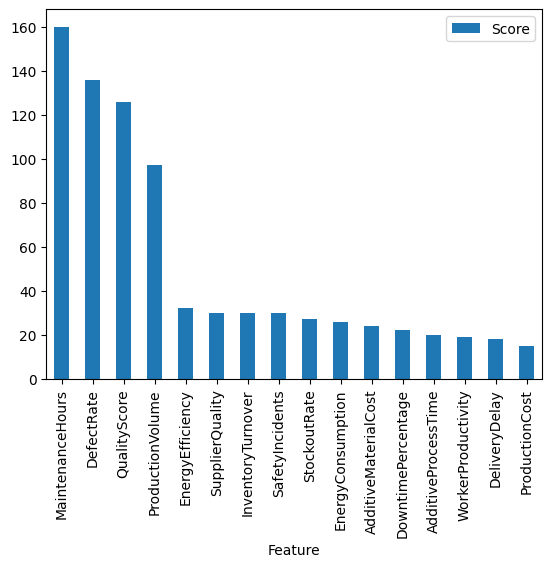

In [6]:
XAI.BuildAnchorTabular(model=Voting.learn(df=df), X_train=Model.CreateTest(df=df)[0],
                            X_test=Model.CreateTest(df=df)[1], slice=200)

Итак, исходя из графика, топ 4 остался таким же и тоже вырываются вперед с огромным отрывом, поэтому можно одназначно сказать, что
эти 4 признака имеют ключевое значение для принятия решения модели, остальные имеют меньшее значение, но тем не менее вносят свою лепту
в итоговое решение (график был построен на основе частоты встречаемости признака в объяснении каждого конкретного решения модели), так как
исходя из прошлых графиков мы выяснили, что свыше сотни элементов в сэмпле не имеют принципиальной разницы, я также использовал сэмпл из 200